# (FordGoBike)
## by (MAHMOUD NAGY)

## Preliminary Wrangling

> Ford GoBike System Data: This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Table of Contents
<ul>
<li><a href="#data_cleaning">Data Cleaning</a></li>
<li><a href="#eda_univariate">Univariate Exploration</a></li>
<li><a href="#eda_bivariate">Bivariate Exploration</a></li>
<li><a href="#eda_multivariate">Multivariate Exploration</a></li>
</ul>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Questions ?
When are most trips taken in terms of time of day, day of the week, or month of the year? <br>
How long does the average trip take? <br>
Does the above depend on if a user is a subscriber or customer? <br>

In [2]:
df = pd.read_csv('fordgobike-tripdata.csv')
print(df.shape)
df.head()

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### What is the structure of your dataset?

> We have 183412 Records (about individual rides made in a bike-sharing system covering the greater San Francisco Bay area) With 16 Features.

### What is/are the main feature(s) of interest in your dataset?

> increasing the total number of rides (total rides duration). <br>
> increasing the total number of customers/ subscribers.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that user_type has the most effect. And I think if we need to increase the number of rides, we need to increase the number of subscribers. <br>
> Also, we can work on the location data, to target new locations and increase the number of customers and subscribers, but this is beyond this analysis. <br>

> The age of customers shall also has a strong effect. <br>
> Also, we can check the bikes IDs that users chose to share for all trip 'cause this might indicate their good condition, and other bikes might need maintenance.

<a id='data_cleaning'></a>
### DATA CLEANING

<ul>
    <li><a href="#data_cleaning"><b>Data Cleaning</b></a></li>
<li><a href="#eda_univariate">Univariate Exploration</a></li>
<li><a href="#eda_bivariate">Bivariate Exploration</a></li>
<li><a href="#eda_multivariate">Multivariate Exploration</a></li>
</ul>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
# Drop NaNs
df.dropna(inplace=True);

In [5]:
df.shape

(174952, 16)

In [6]:
# Converting the duration_sec to duration in minutes
df.duration_sec = df.duration_sec / 3600
df.rename(columns={'duration_sec': 'duration_hrs'}, inplace=True)

In [7]:
# convert start_time and end_time to datetime 
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [8]:
# convert the start_station_id, end_station_id, bike_id
df.start_station_id = df.start_station_id.astype('int')
df.start_station_id = df.start_station_id.astype('str')

df.end_station_id = df.end_station_id.astype('int')
df.end_station_id = df.end_station_id.astype('str')

df.bike_id = df.bike_id.astype('str')

In [9]:
# convert member_birth_year to int
df.member_birth_year = df.member_birth_year.astype('int')

In [10]:
df.head(2)

,duration_hrs,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,14.495833,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,17.181667,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No


In [11]:
df.member_birth_year.value_counts()

1988    10214
1993     9323
1989     8967
1990     8640
1991     8484
        ...  
1927        1
1878        1
1930        1
1928        1
1910        1
Name: member_birth_year, Length: 75, dtype: int64

In [12]:
# Create an age column by subtracting the member_birth_year from the trip year
df['age'] = df.start_time.dt.year - df.member_birth_year

# Drop the member_birth_year column 
df.drop('member_birth_year', axis=1, inplace=True)

In [13]:
# check for duplicates
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_hrs             174952 non-null  float64       
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [15]:
list1 = ['start_station_name', 'end_station_name', 'bike_id', 'user_type', 'member_gender', 'bike_share_for_all_trip']

for col in list1:
    print('Value Counts of: ' + col )
    print(df[col].value_counts())
    print('\n')

Value Counts of: start_station_name
Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64


Value Counts of: end_station_name
San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART

In [16]:
# Drop the columns we are not going to use in this analysis
df.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'],
           axis=1, inplace=True)

In [17]:
# descriptive statistics for numeric variables
df.describe()

,duration_hrs,age
count,174952.000000,174952.000000
mean,0.195556,34.196865
std,0.456168,10.118731
min,0.016944,18.000000
25%,0.089722,27.000000
50%,0.141667,32.000000
75%,0.219167,39.000000
max,23.485556,141.000000


In [18]:
# https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
# Detect and exclude outliers in Pandas data frame

# from scipy import stats
# df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

# keep only the ones that are within +3 to -3 standard deviations in the column 'age'.
df = df[np.abs(df.age-df.age.mean()) <= (3*df.age.std())]

In [19]:
df.shape

(173272, 12)

In [20]:
df.describe()

,duration_hrs,age
count,173272.000000,173272.000000
mean,0.195522,33.828253
std,0.457585,9.378430
min,0.016944,18.000000
25%,0.089722,27.000000
50%,0.141667,32.000000
75%,0.218889,39.000000
max,23.485556,64.000000


In [21]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'duration_hrs'.
df = df[np.abs(df.duration_hrs-df.duration_hrs.mean()) <= (6*df.duration_hrs.std())]

In [22]:
df.shape

(172936, 12)

In [23]:
df.describe()

,duration_hrs,age
count,172936.000000,172936.000000
mean,0.180007,33.828312
std,0.166758,9.380221
min,0.016944,18.000000
25%,0.089722,27.000000
50%,0.141389,32.000000
75%,0.218333,39.000000
max,2.935833,64.000000


In [24]:
# create a start_hr column 
df['start_hr'] = df.start_time.dt.hour

**How long does the average trip take?** 

In [25]:
df.duration_hrs.mean() * 60

10.800401593653293

In [26]:
df.duration_hrs.median() * 60

8.483333333333334

So the average trip duration is about 10 minutes.

<a id='eda_univariate'></a>
## Univariate Exploration

<ul>
<li><a href="#data_cleaning">Data Cleaning</a></li>
<li><a href="#eda_univariate"><b>Univariate Exploration</b></a></li>
<li><a href="#eda_bivariate">Bivariate Exploration</a></li>
<li><a href="#eda_multivariate">Multivariate Exploration</a></li>
</ul>

>### Check the distribution of numerical columns

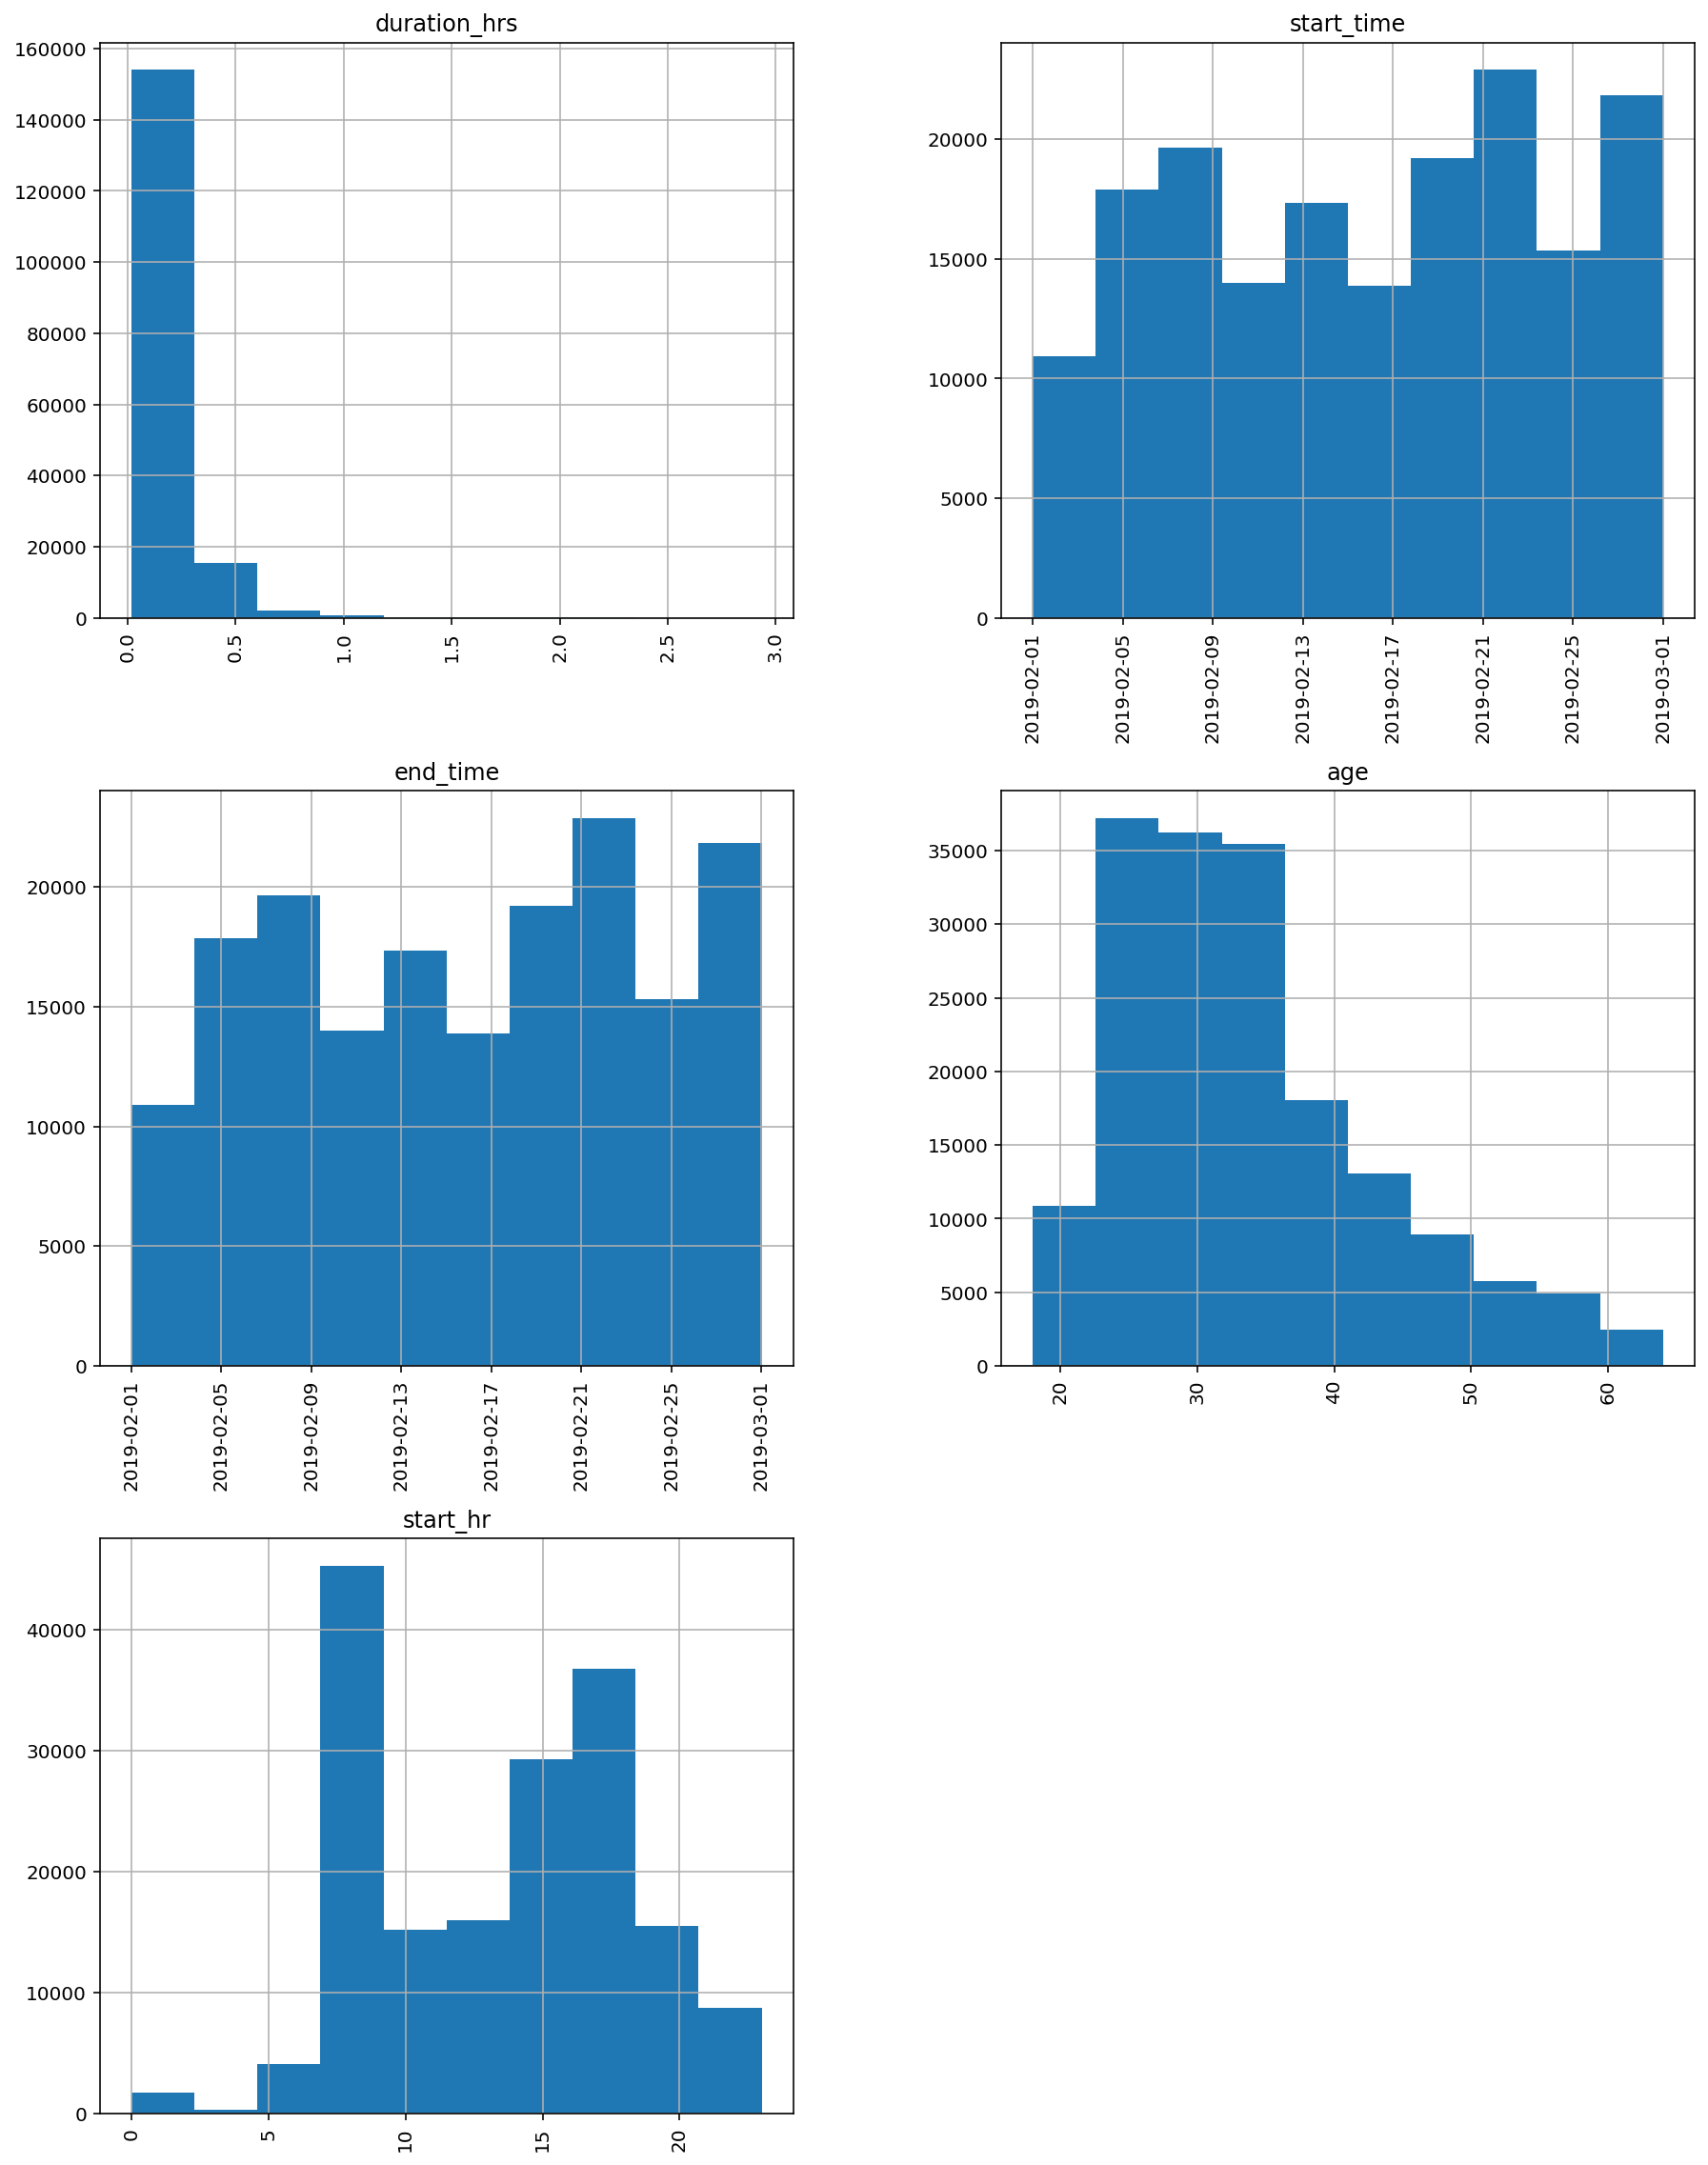

In [27]:
# Check the distribution of numerical columns
df.hist(figsize=(15, 20), xrot = 90);

**From the Numerical columns distributions we notice:**
  - most of the trips have a duration less than 20 minutes. 
  - most of the users are between 22 and 38 years old.
  - the users count decreases as their age increases.
  - there is almost no trips between midnight and 7 AM.

> ### Gender Count

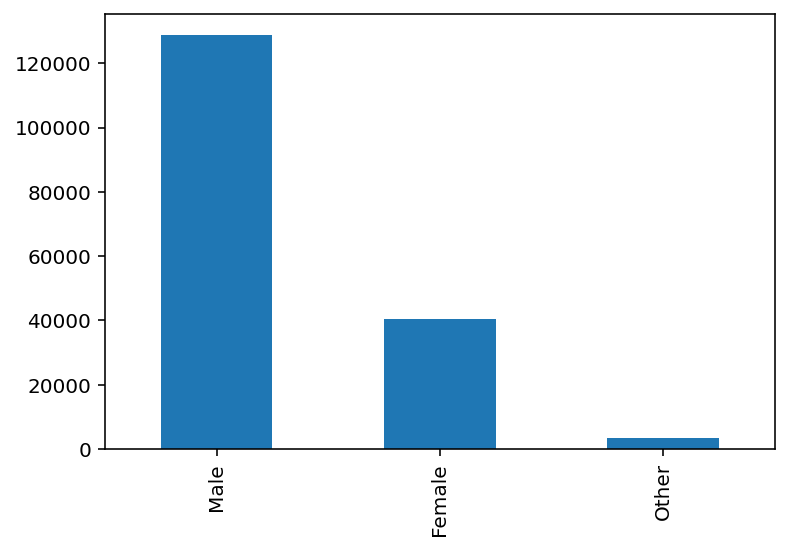

In [28]:
# gender count
# Bar Chart --> for categorical data
# Histogram --> for numerical data
df.member_gender.value_counts().plot(kind='bar');

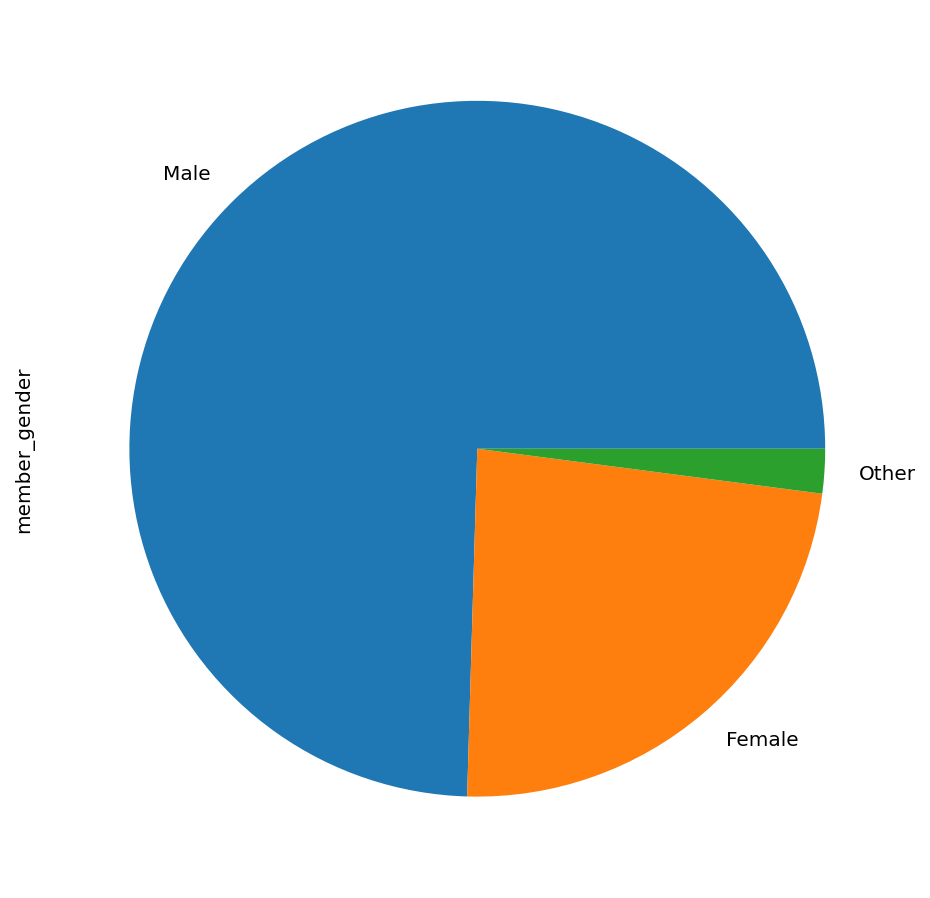

In [29]:
# Draw a pie chart to show the proportions of each gender
df.member_gender.value_counts().plot(kind='pie', figsize=(8,8));

We can see that we have way more males than females.

>### User Types Count

In [30]:
df.user_type.value_counts()

Subscriber    156608
Customer       16328
Name: user_type, dtype: int64

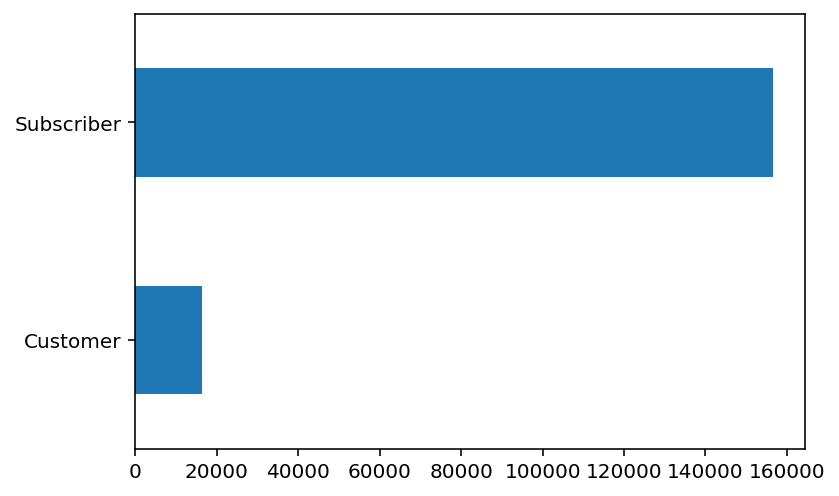

In [611]:
# Check user types count

df.user_type.value_counts().plot(kind='barh');
plt.gca().invert_yaxis()

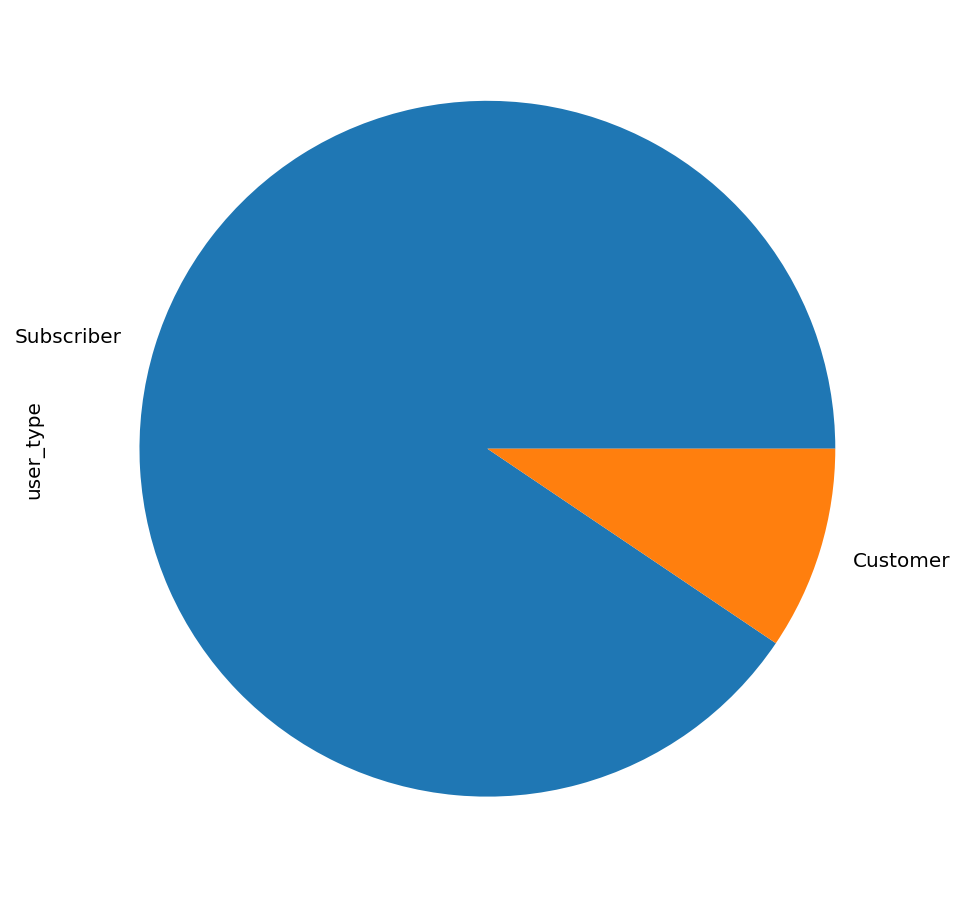

In [612]:
# Draw a pie chart to show the proportions of each user type
df.user_type.value_counts().plot(kind='pie', figsize=(8,8));

Most of the users are Subscribers.

>### Zoom In the start_time column to get the distribution of hours

In [613]:
df.head(2)

,duration_hrs,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,age,start_hr
4,0.440278,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,Male,Yes,45,23
5,0.498056,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,Male,No,60,23


In [614]:
# # Both lines do the same function of count values, but the 1st is better
# df.groupby('start_hr').size().reset_index(name='count')
# df.groupby('start_hr').agg('count')['start_time'].to_frame()

In [615]:
# define a fuction to groupby hours then plot a bar chart

def plot_hrs(df):
      # The column we use in groupby --> is our new index
      # the value here ['start_hr'] --> is any column to count 
    df_hrs = df.groupby('start_hr').size().reset_index(name='count')
      # Plot a bar chart
    df_hrs.plot(x='start_hr', y='count', kind="bar", figsize=(14,7));

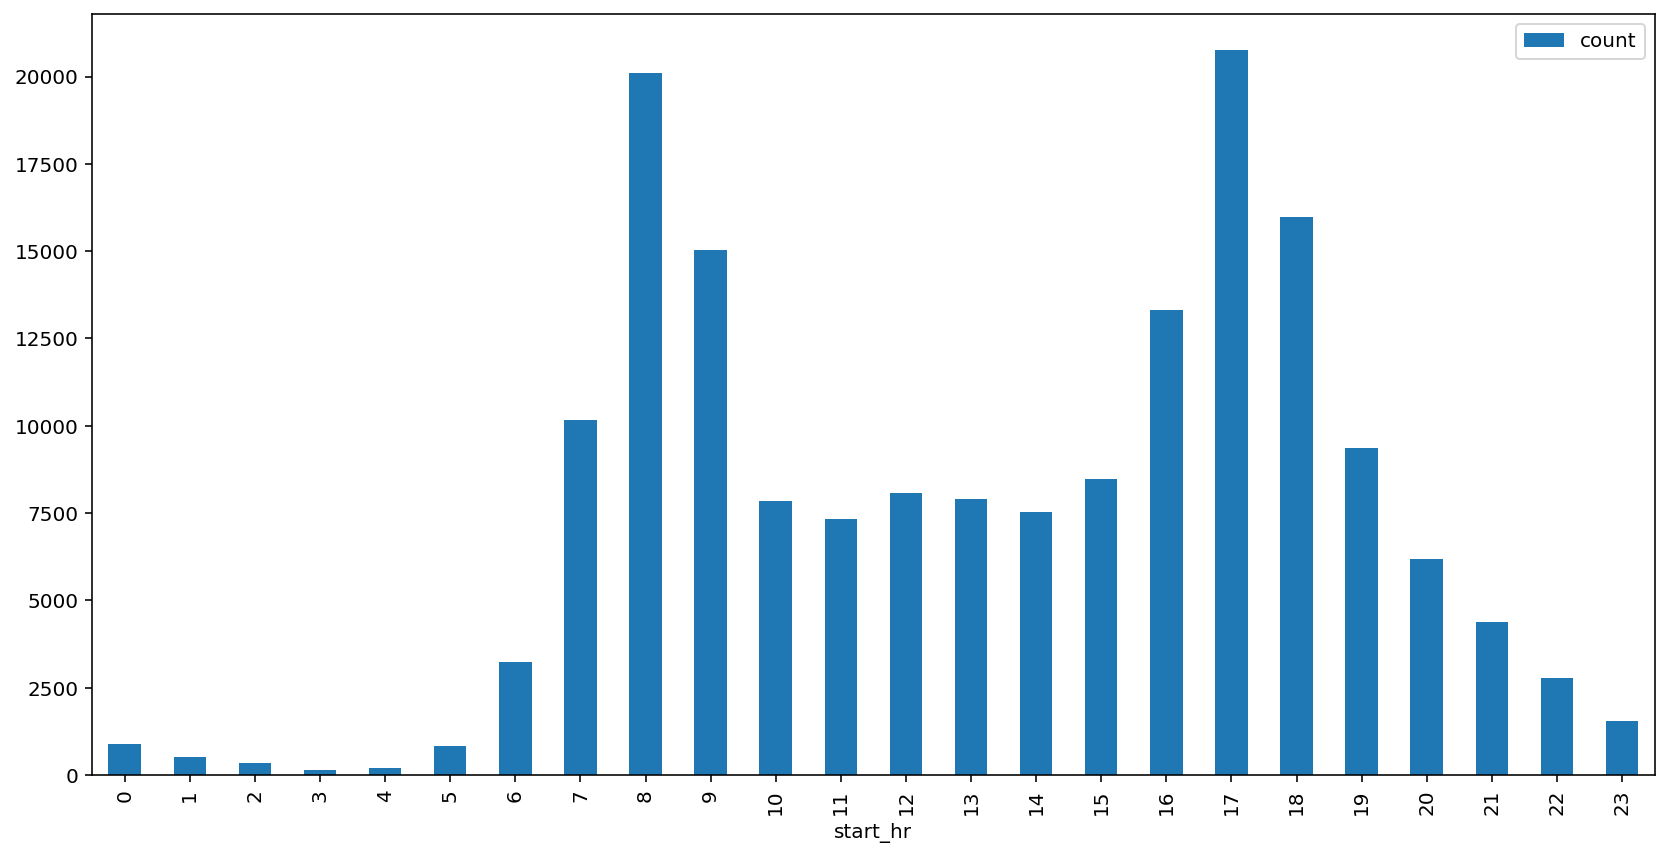

In [616]:
plot_hrs(df)

We note that we have two peaks: <br>
  - One in the normal work start time (from 7 to 9 am).
  - The other peak in the normal work end time (from 4 to 7 pm).
  
This is interesting and indicates that most of the users use bikes to go for work, then to come back home.

>### Compare between Customers and Subscribers start_hrs

In [617]:
# compare between Subscribers and Customers (start_hrs, duration_hrs, age, etc...)

# Create two dataframes: one for each user type. 
df_customers = df.query("user_type == 'Customer'")
df_subscribers = df.query("user_type == 'Subscriber'")

>>### For Customers:

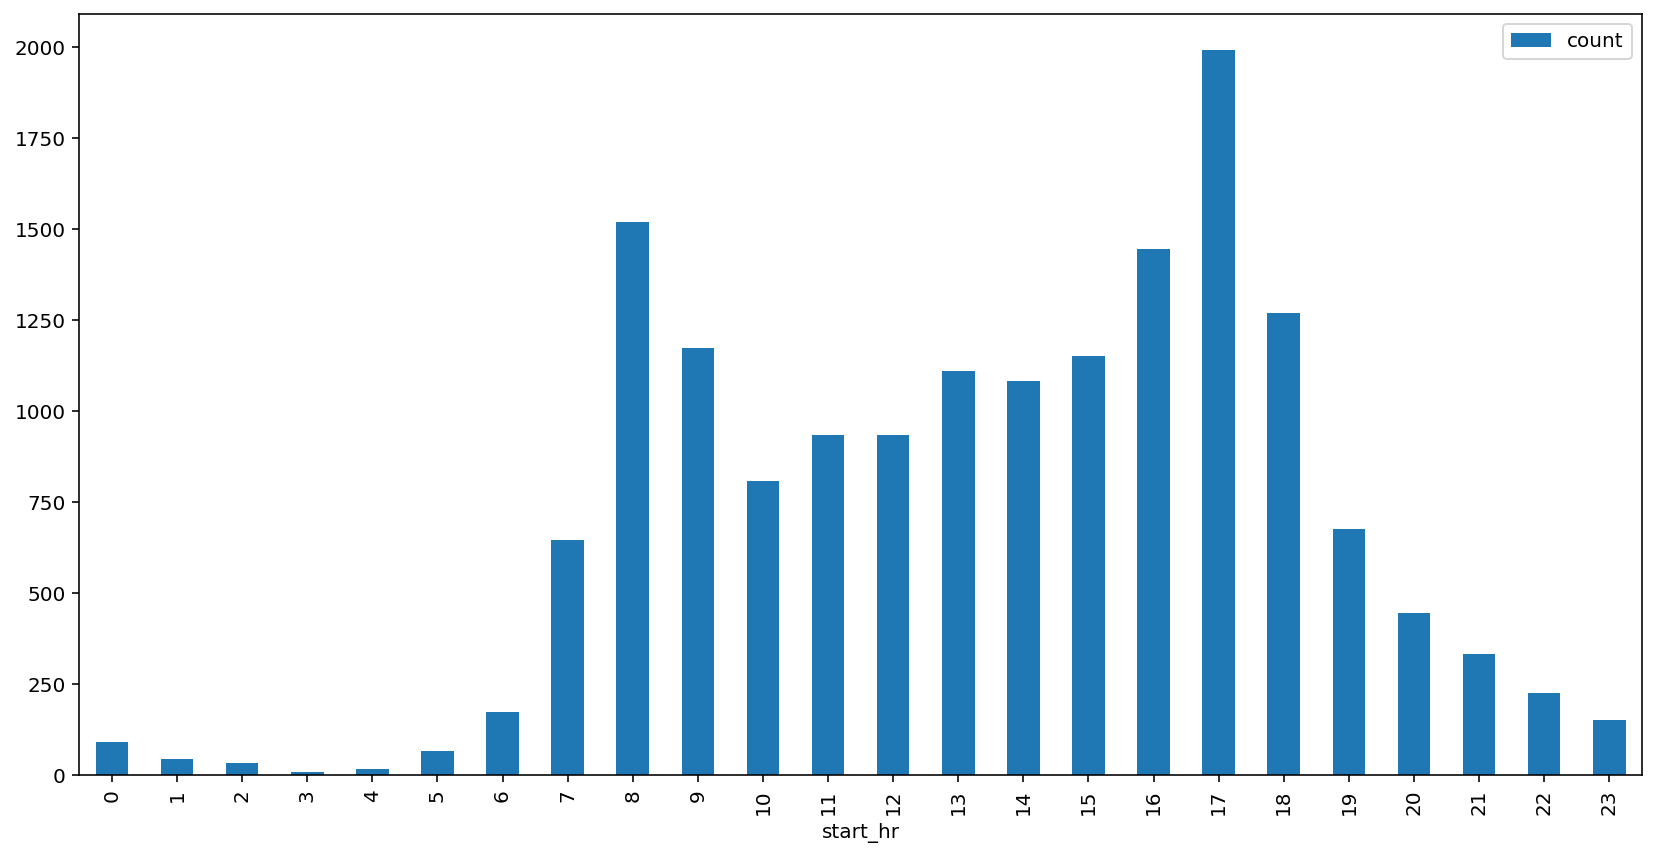

In [618]:
plot_hrs(df_customers)

As shown from the graph: <br>
- Some of the customers are using bikes to go for their work --> there is a high possibility that these customers will subscribe soon especially if we made offers for them.

- While others use bikes for other day activities, we need to think, what can we do to increse their subscription? 

>>### For Subscribers:

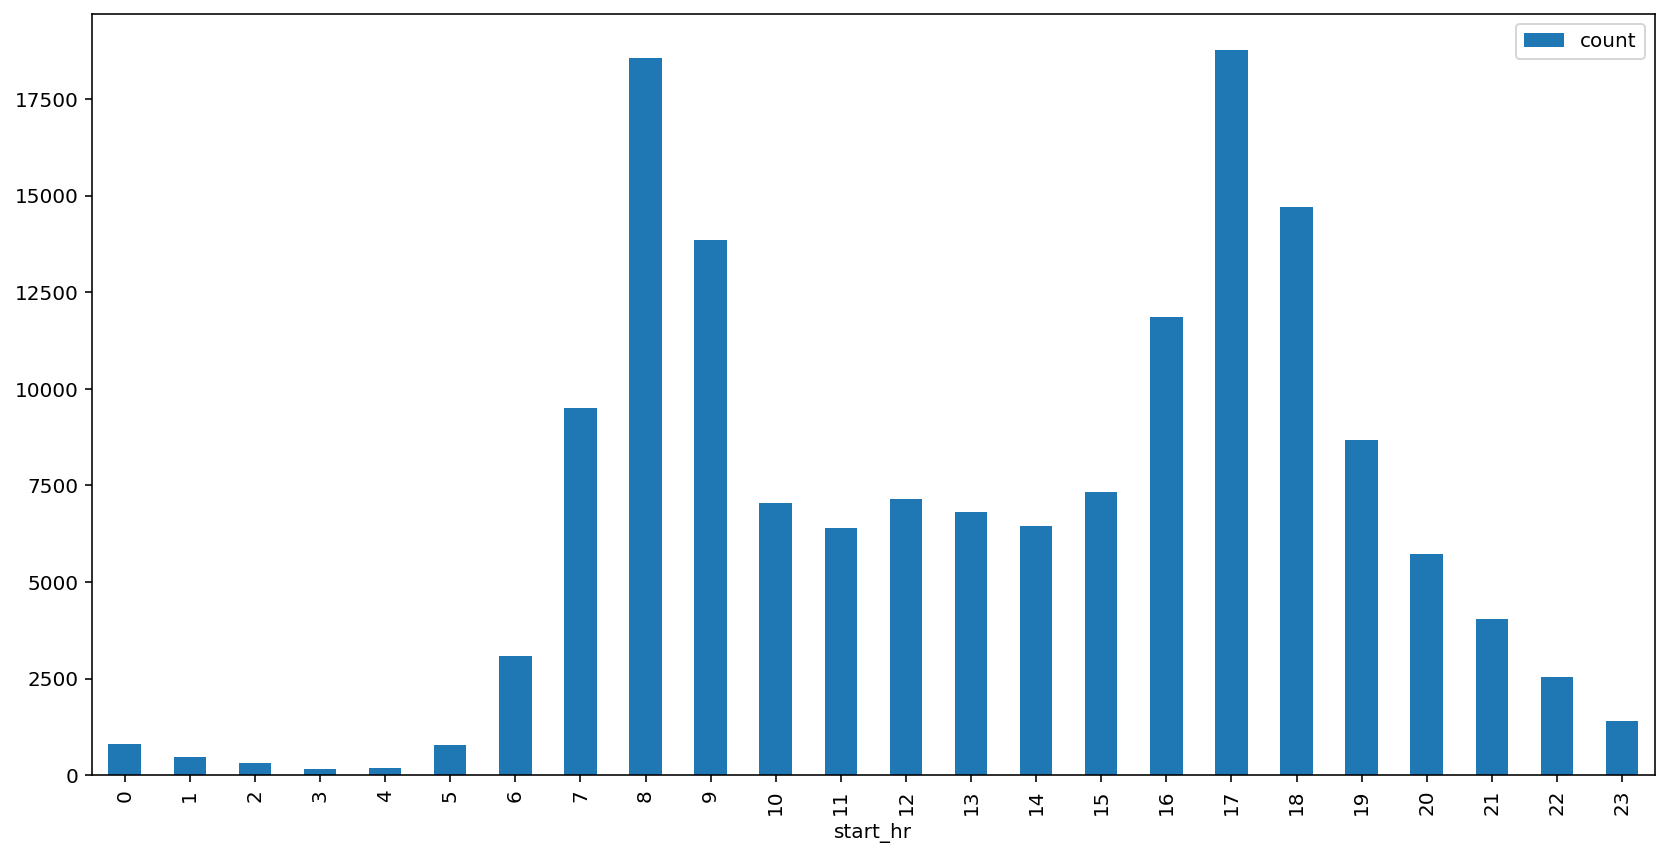

In [619]:
plot_hrs(df_subscribers)

As expected the difference between work hours and the rest of the day is more obvious in the Subscribers data. <br>
This indicates that most of the subscribers are using bikes to go for their work.

>### Compare between Males and Females (start_hrs, duration_hrs, age, etc...)

In [620]:
# Create two dataframes: one for each user type. 
df_males = df.query("member_gender == 'Male'")
df_females = df.query("member_gender == 'Female'")

>>### For Males:

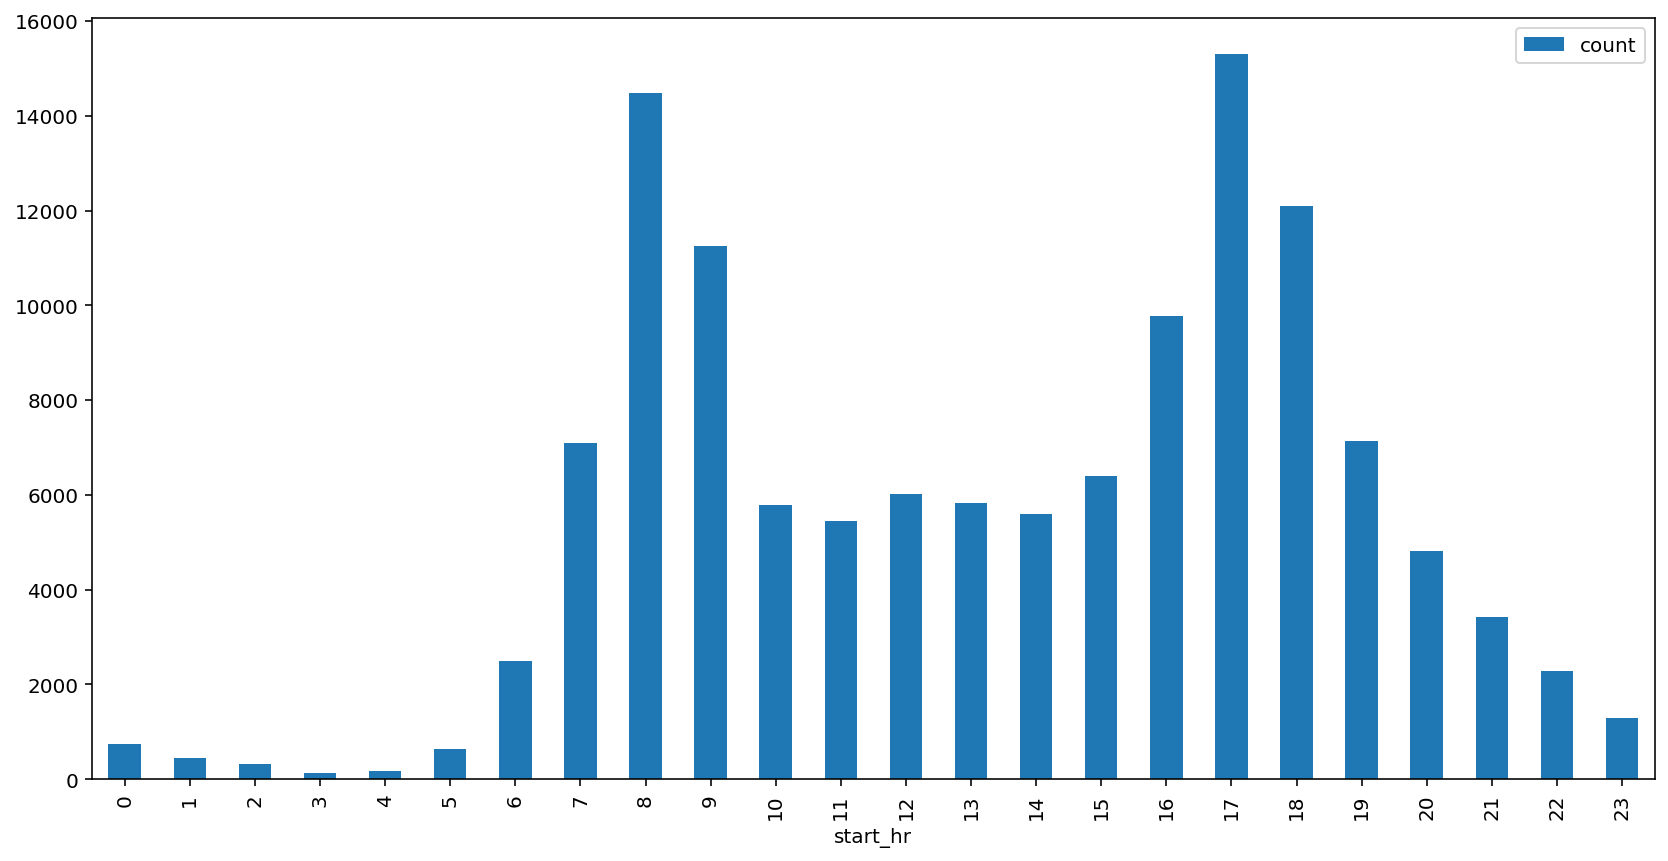

In [621]:
plot_hrs(df_males)

>>### For Females:

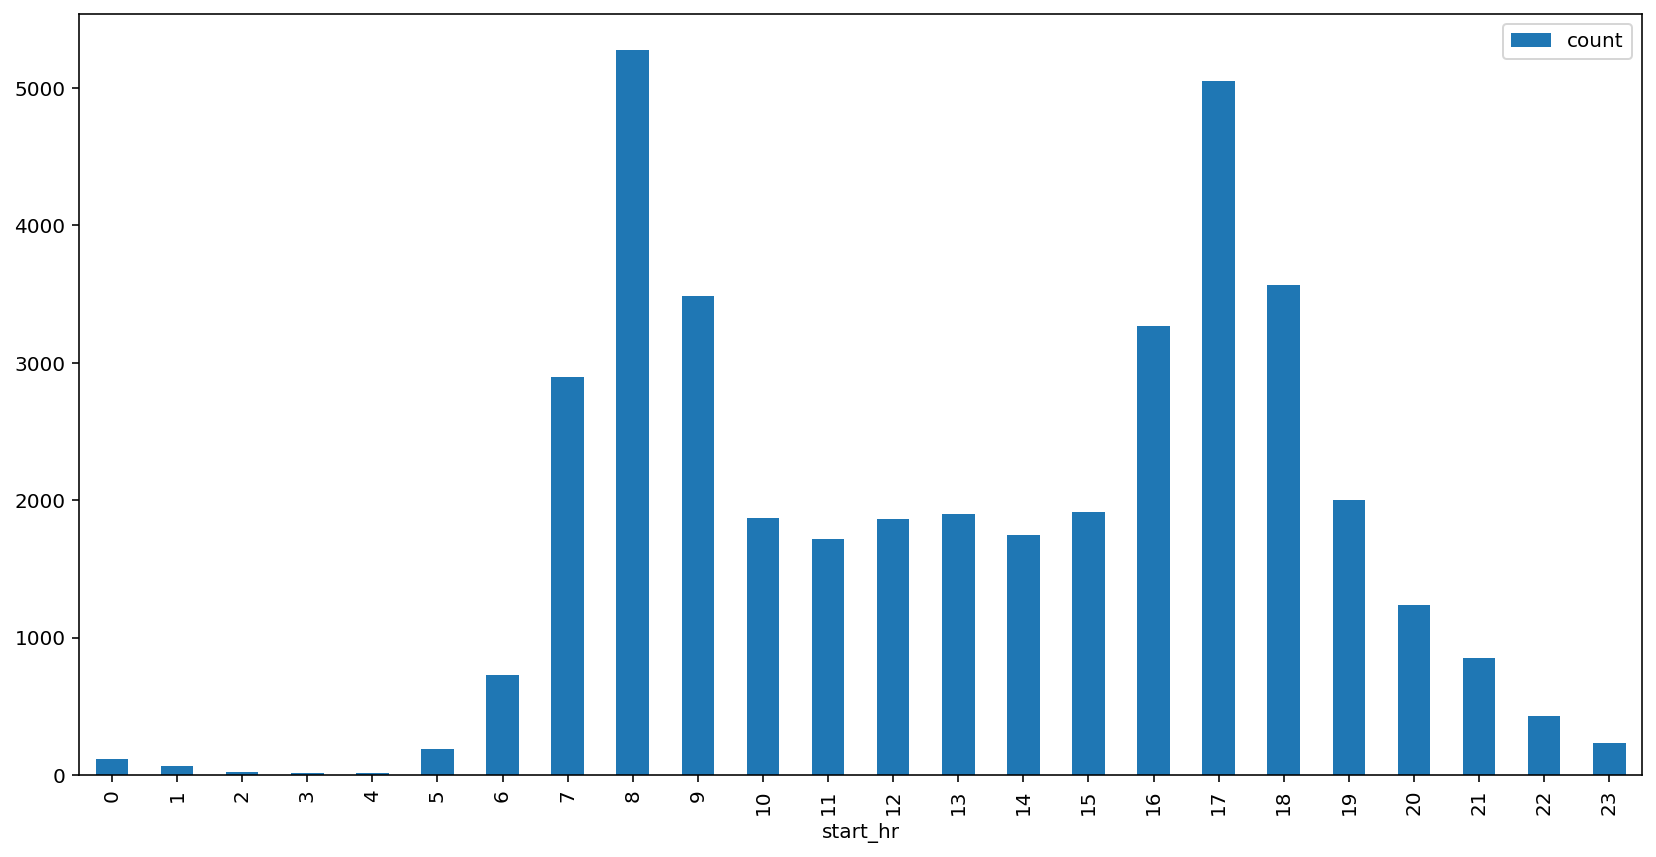

In [622]:
plot_hrs(df_females)

Seems like males and females have the same riding hours distribution. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> **In the start hour distribution We note that:**
>   - **For Subscribers we have two obvious peaks:** 
>      - One in the normal work start time (from 7 to 9 am).
>      - The other peak in the normal work end time (from 4 to 7 pm).
>   - **For Customers the peaks are less obvious:** 
>      - Some of the customers are using bikes to go for their work --> there is a high possibility that these customers will subscribe soon especially if we made offers for them.
>      - While others use bikes for other day activities, we need to think, what can we do to increse their subscription? 
  
> This is interesting and indicates that most of the users use bikes to go for work, then to come back home.
  
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> **From the Numerical columns distributions we notice:**
>   - most of the trips have a duration less than 20 minutes. 
>   - most of the users are between 22 and 38 years old.
>   - the users count decreases as their age increases.
>   - there is almost no trips between midnight and 7 AM.

> Yes, added a column having the start time hour 'cause we will need to use alot in the analysis. <br>
> Also calculated the age of the users from their birth year.

<a id='eda_bivariate'></a>
## Bivariate Exploration

<ul>
<li><a href="#data_cleaning">Data Cleaning</a></li>
<li><a href="#eda_univariate">Univariate Exploration</a></li>
    <li><a href="#eda_bivariate"><b>Bivariate Exploration</b></a></li>
<li><a href="#eda_multivariate">Multivariate Exploration</a></li>
</ul>


In [623]:
numeric_vars = ['duration_hrs', 'age', 'start_hr']
# categoric_vars = ['start_station_name', 'end_station_name', 'bike_id', 'user_type', 'member_gender', 'bike_share_for_all_trip']


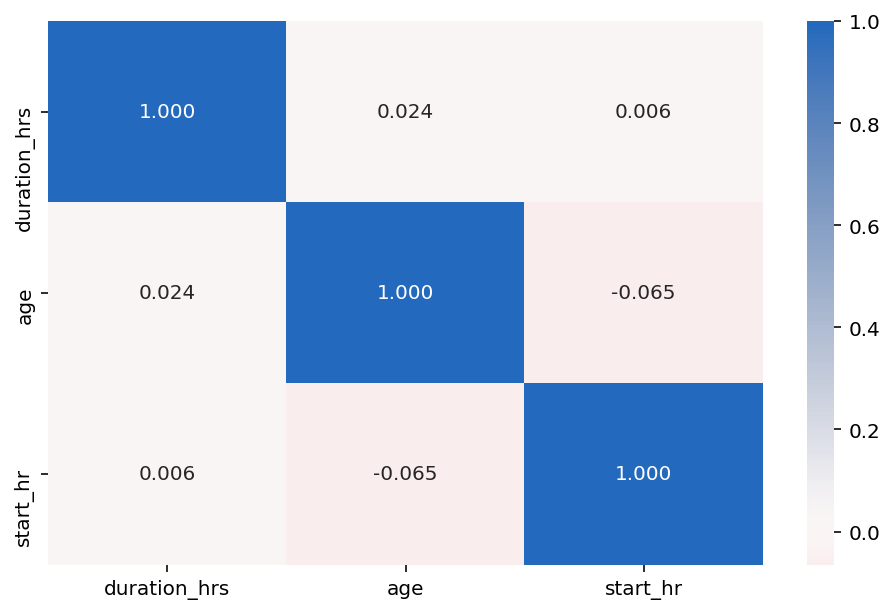

In [624]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

No strong correlation observered

>### Customers VS Subscribers Rides in weekdays

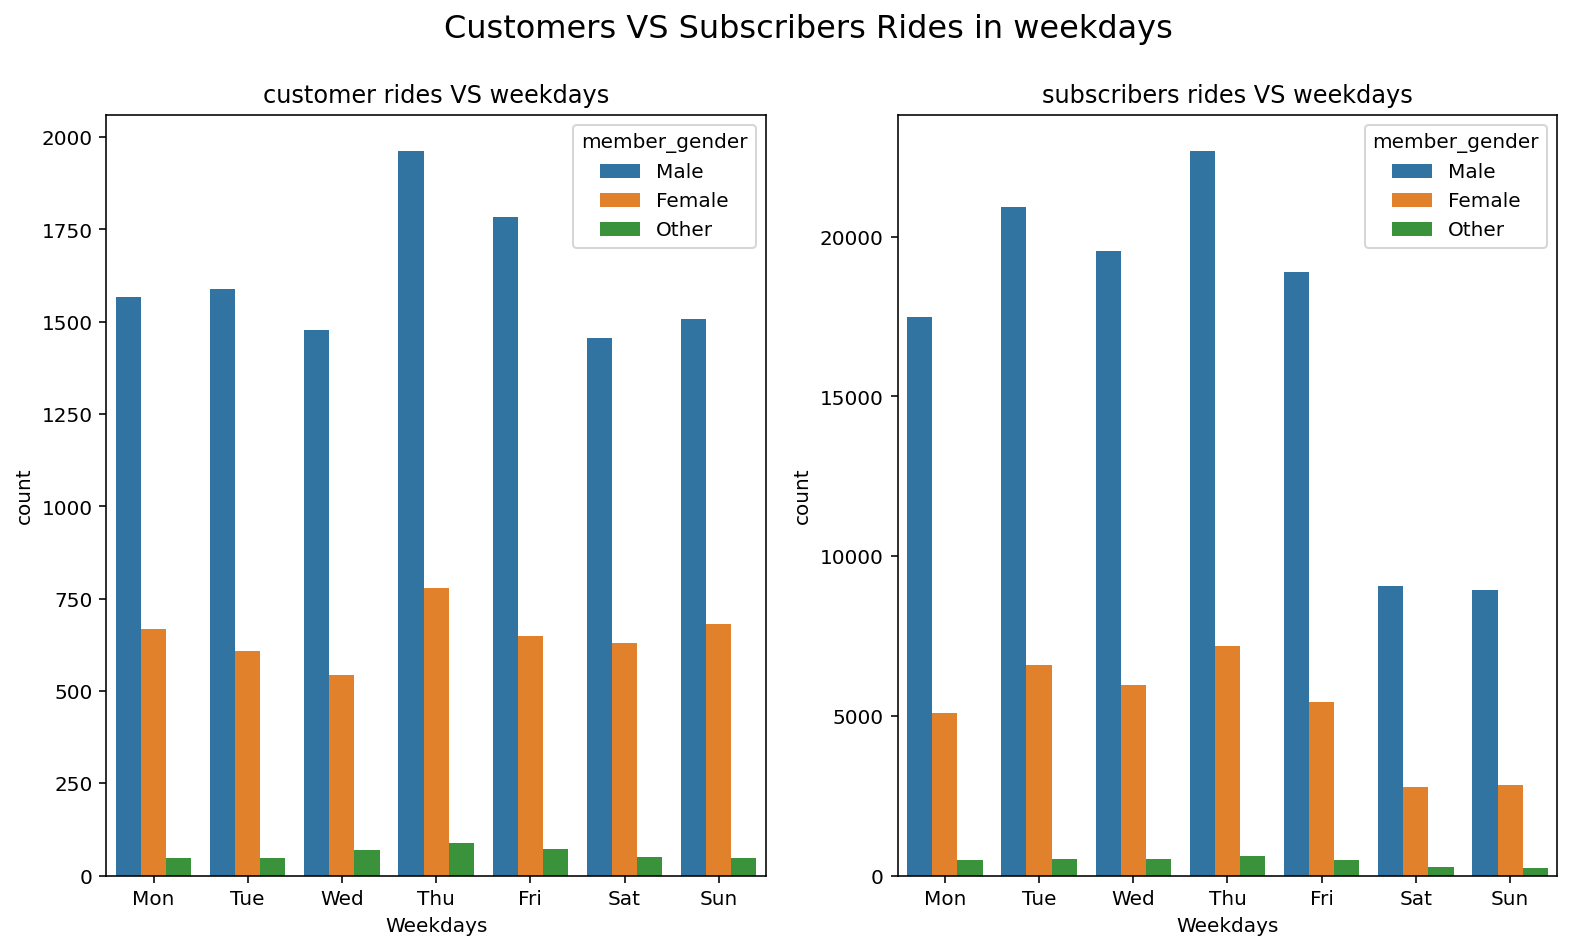

In [625]:
HU = df.member_gender
HU_order = df['member_gender'].value_counts().index
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


plt.figure(figsize=(13,7))
plt.suptitle("Customers VS Subscribers Rides in weekdays", size=16);

plt.subplot(1,2,1)
X= df_customers.start_time.dt.strftime('%a')
sb.countplot(data = df_customers, x=X, order=weekdays, hue=HU, hue_order=HU_order); 
plt.title('customer rides VS weekdays')
plt.xlabel('Weekdays');


plt.subplot(1,2,2)
X= df_subscribers.start_time.dt.strftime('%a')
sb.countplot(data = df_subscribers, x=X, order=weekdays, hue=HU, hue_order=HU_order); 
plt.title('subscribers rides VS weekdays');
plt.xlabel('Weekdays');


**Note:** Subscribers have less rides in weekends, which supports our previous result that more subscribers are using bikes to go for their work.

In [626]:
# type() --> for normal python datatypes
# .dtype --> for dataframe column types

>### Compare between Customers and Subscribers trip start_hrs

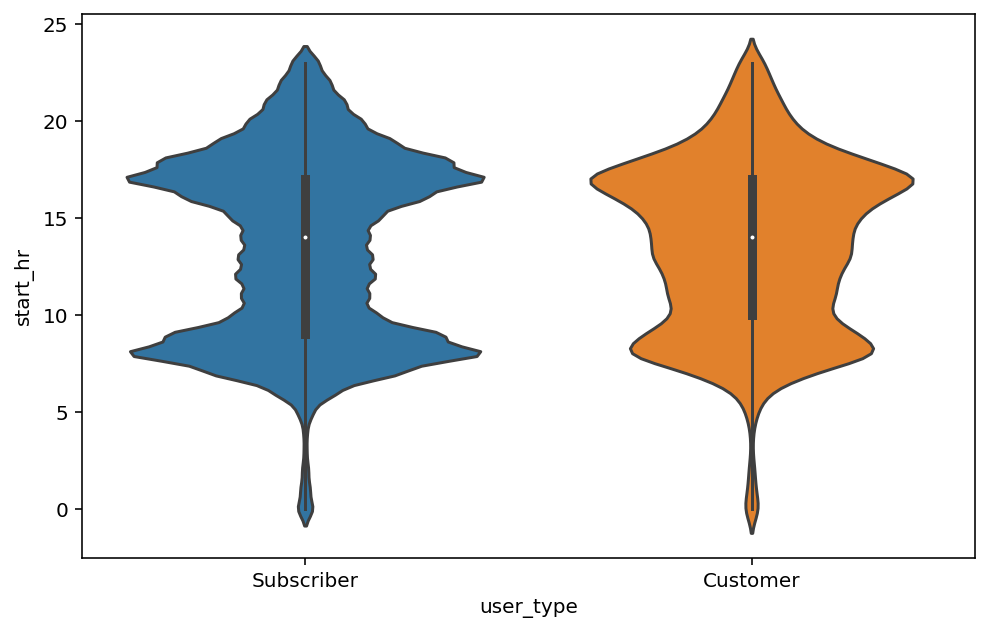

In [627]:
plt.figure(figsize=[8,5])
sb.violinplot(data=df, x='user_type', y=df.start_hr); 

>### Compare between Customers and Subscribers age

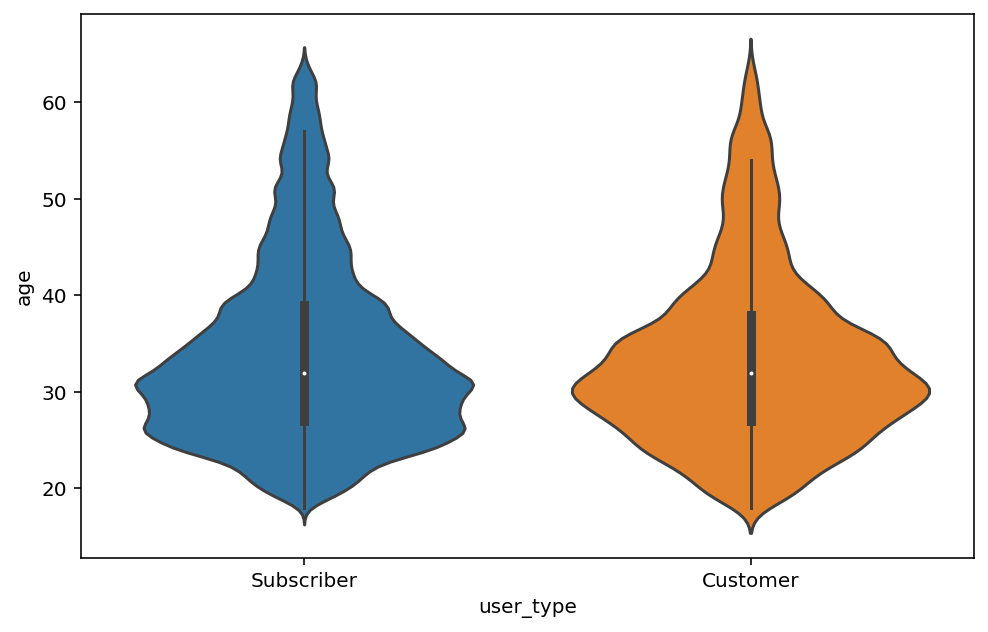

In [628]:
plt.figure(figsize=[8,5])
sb.violinplot(data=df, x='user_type', y='age'); 

Most of the users (Customers/ Subscribers) are between 20 and 40 years old

>### Relationship between Age and Riding Duration

In [629]:
# # https://pbpython.com/pandas-qcut-cut.html
# plt.figure(figsize=[8,5])
# sb.violinplot(data=df, y='duration_hrs', x=pd.qcut(df['age'], q=4)); 

In [630]:
# pd.plotting.scatter_matrix(df, figsize=(15,15));

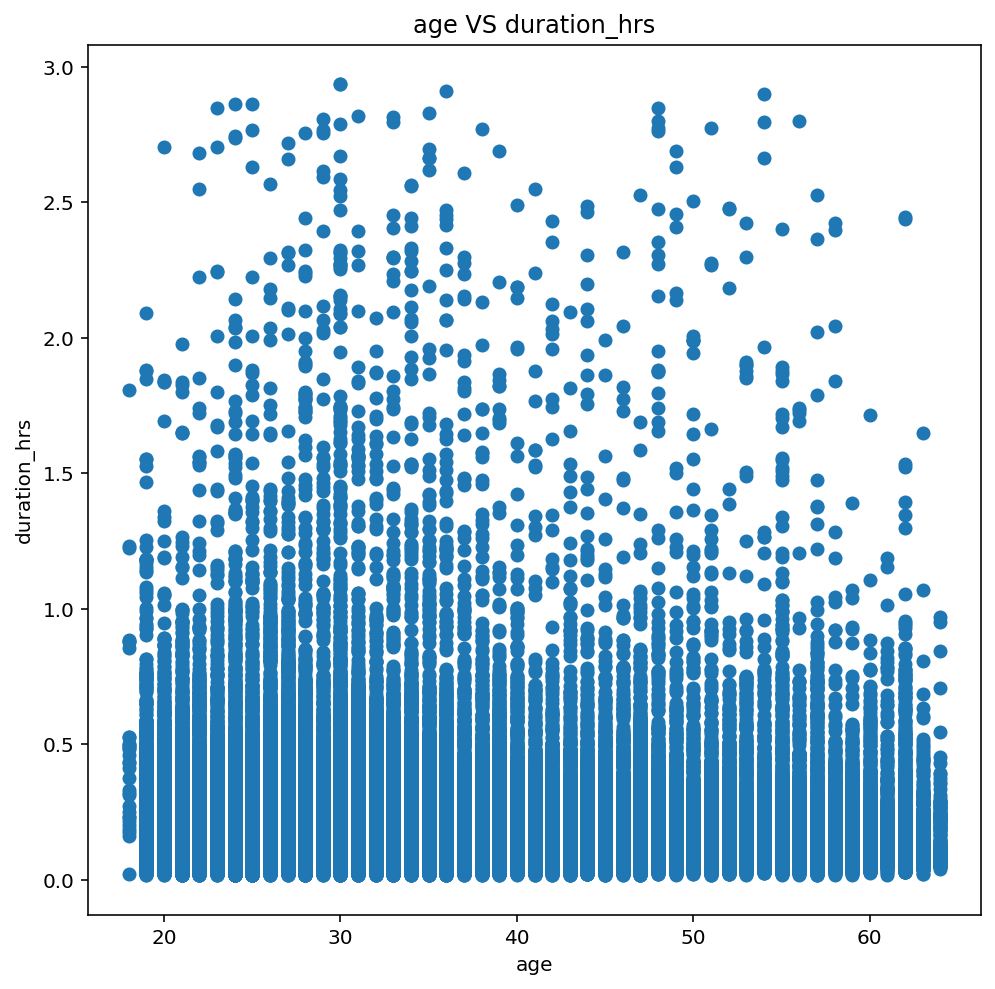

In [631]:
# Draw a scatter plot between age and duration_hrs
plt.figure(figsize=(8, 8))
plt.scatter(df['age'], df['duration_hrs'])
plt.xlabel('age')
plt.ylabel('duration_hrs')
plt.title('age VS duration_hrs');

As expected younger people ride for longer durations.

>### Relationship between Duration and Start Time

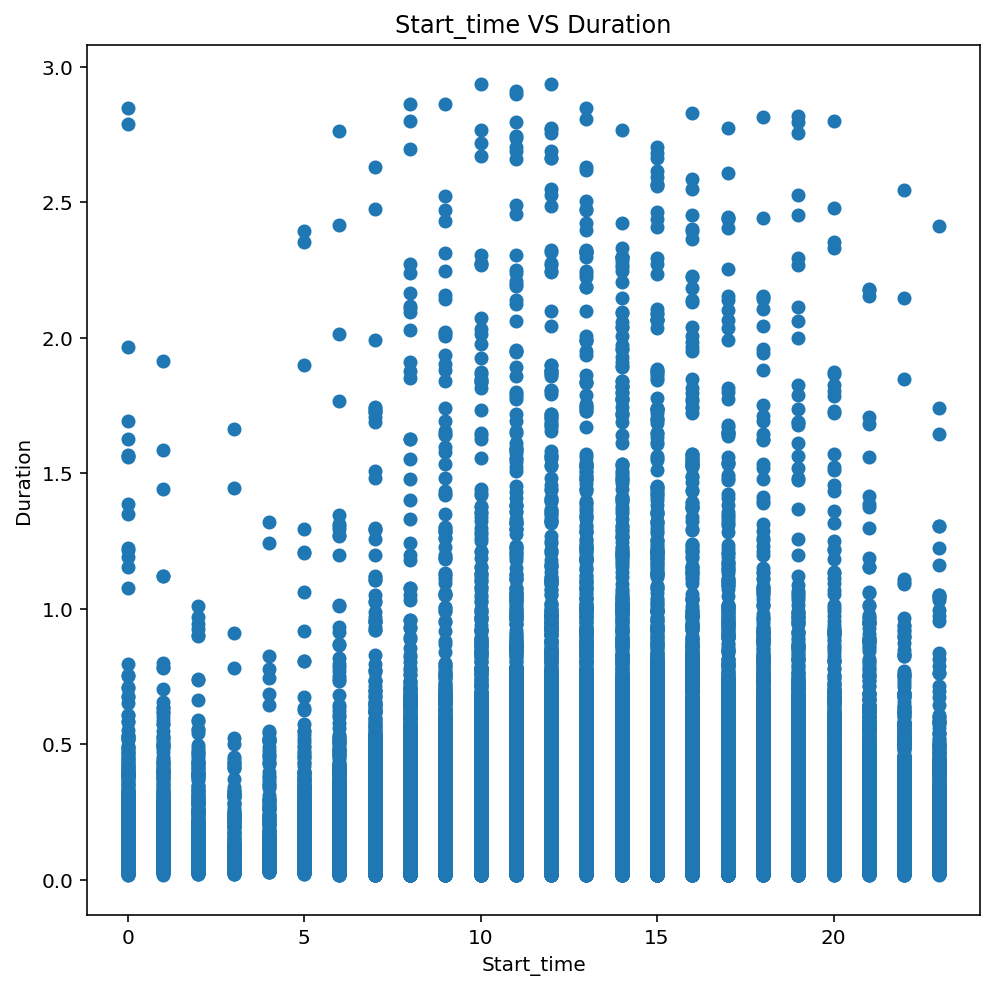

In [632]:
plt.figure(figsize=(8, 8))
plt.scatter(df.start_hr, df['duration_hrs'])
plt.xlabel('Start_time')
plt.ylabel('Duration')
plt.title('Start_time VS Duration');

The rides with the longest durations are between 8 AM and 7 PM (afternoon and evening) <br>

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Subscribers have less rides in weekends, which supports our previous result that more subscribers are using bikes to go for their work. <br>
> As expected younger people ride for longer durations. <br>
> The rides with the longest durations are between 8 AM and 7 PM (afternoon and evening). 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No

<a id='eda_multivariate'></a>
## Multivariate Exploration

<ul>
<li><a href="#data_cleaning">Data Cleaning</a></li>
<li><a href="#eda_univariate">Univariate Exploration</a></li>
<li><a href="#eda_bivariate">Bivariate Exploration</a></li>
    <li><a href="#eda_multivariate"><b>Multivariate Exploration</b></a></li>
</ul>


>### Relationship between Duration of the trip and the Age of the user

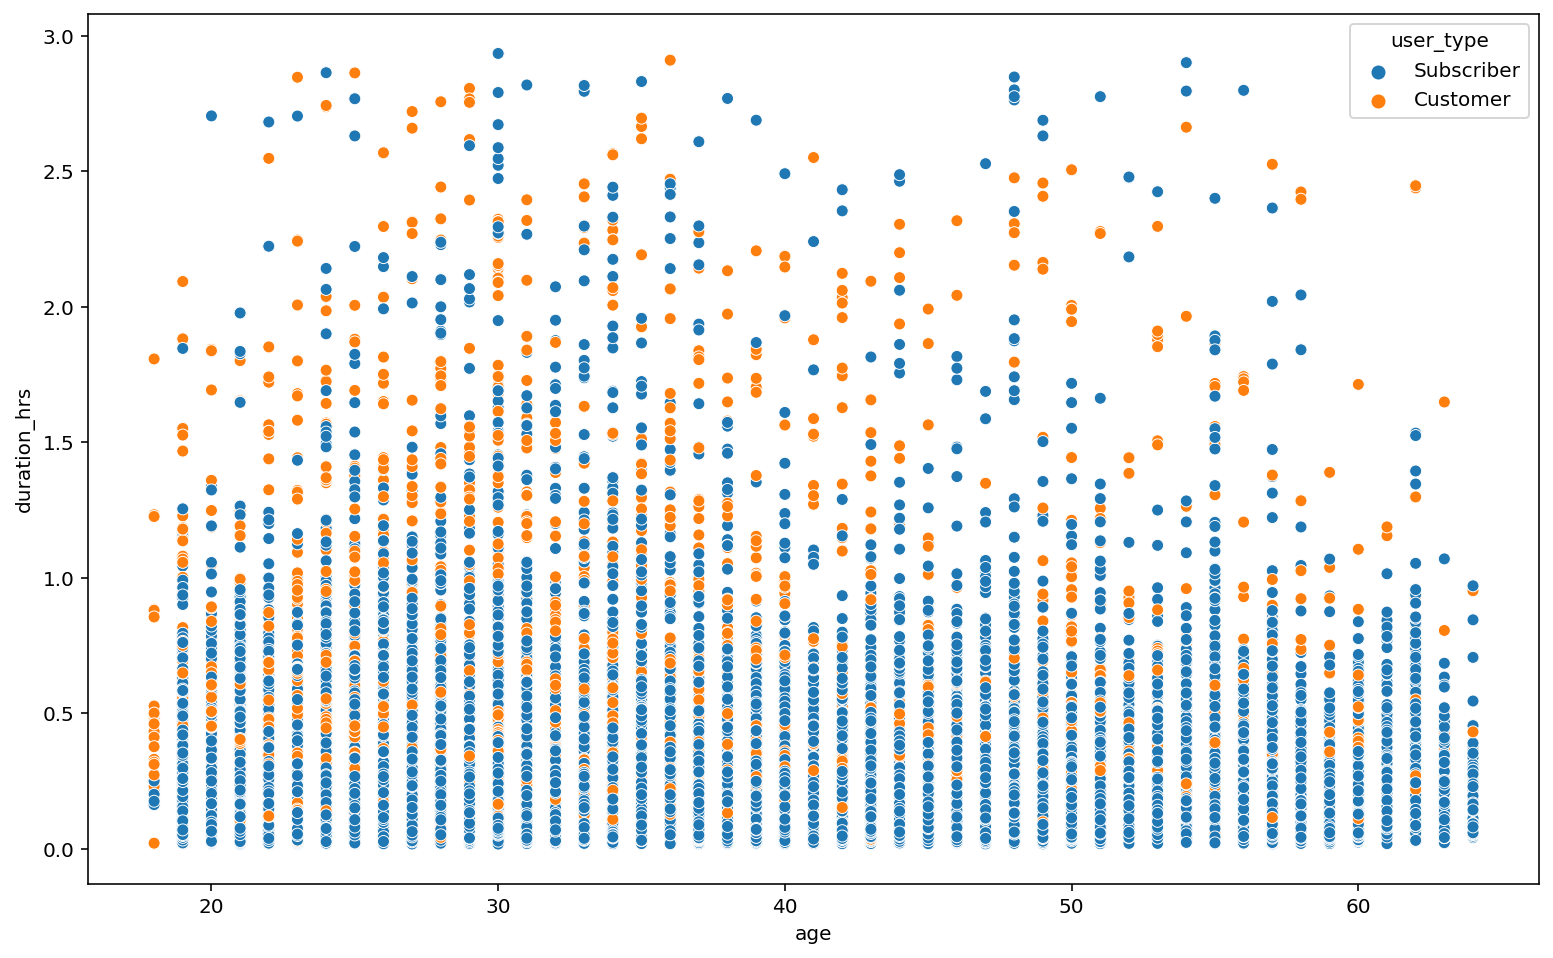

In [633]:
plt.figure(figsize=[13,8])
sb.scatterplot(x='age', y='duration_hrs', data=df, hue='user_type');

**Duaration of the rides increases as the age of the use decreases.**

**Note:** More subscribers make shorter rides than customers. <br>

This can be due to the difference in the purpose/nature of each user type rides: <br>
  - Subscribers most use bikes to go for work (may be near work locations).
  - Customers may use bikes for sports activities or other purposes.


>### Relationship between Duration and Start Time

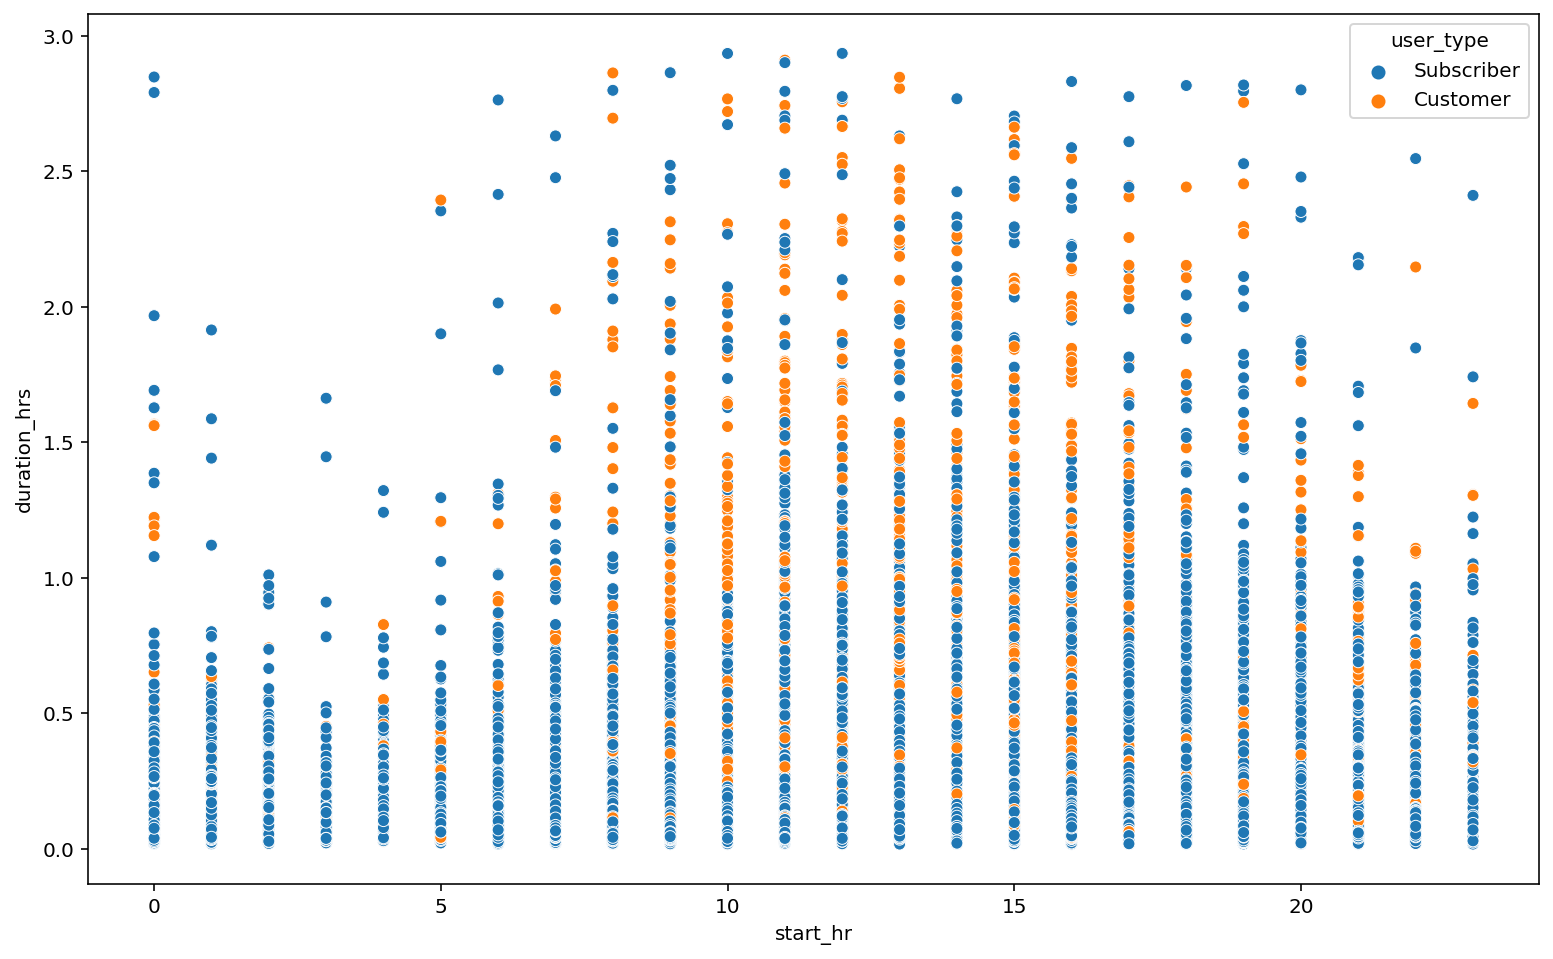

In [634]:
plt.figure(figsize=[13,8])
sb.scatterplot(x=df.start_hr, y='duration_hrs', data=df, hue='user_type');


**The rides with the longest durations are between 8 AM and 7 PM (afternoon and evening).**

**Note:** More subscribers make shorter rides than customers. <br>

This can be due to the difference in the purpose/nature of each user type rides: <br>
  - Subscribers most use bikes to go for work (may be near work locations).
  - Customers may use bikes for sports activities or other purposes.
  


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> **Note:** More subscribers make shorter rides than customers. <br>
> This can be due to the difference in the purpose/nature of each user type rides: <br>
>    - Subscribers most use bikes to go for work (may be near work locations).
>    - Customers may use bikes for sports activities or other purposes.

> YES, Subscribers have less rides in weekends, which supports our previous result (from the distribution of start hour) that more subscribers are using bikes to go for their work. 

### Were there any interesting or surprising interactions between features?

> The rides with the longest durations are between 8 AM and 7 PM (afternoon and evening) <br>
> As expected younger people ride for longer durations. <br>
> Most of the users (Customers/ Subscribers) are between 20 and 40 years old

In [635]:
# save a clean csv file to use in the explanatory analysis
df.to_csv('fordgobike-clean.csv', index=False)